# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [215]:
#Import all the necessary modules
# To enable plotting graphs in Jupyter notebook

%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import zscore # Helps me normalize the numerical columns
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [216]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [217]:
pima_df.sample(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
440,0,189,104,25,0,34.3,0.435,41,1
158,2,88,74,19,53,29.0,0.229,22,0
221,2,158,90,0,0,31.6,0.805,66,1
720,4,83,86,19,0,29.3,0.317,34,0
11,10,168,74,0,0,38.0,0.537,34,1
583,8,100,76,0,0,38.7,0.190,42,0
669,9,154,78,30,100,30.9,0.164,45,0
13,1,189,60,23,846,30.1,0.398,59,1
564,0,91,80,0,0,32.4,0.601,27,0
542,10,90,85,32,0,34.9,0.825,56,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [218]:
print("Shape of the dataframe is:",pima_df.shape)
print("\n\nThe data types are:",pima_df.dtypes)

Shape of the dataframe is: (768, 9)


The data types are: preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [219]:
#function for 0 replacement with median
def ZeroReplacement(a):
    a=a.replace(0,np.median(a))
    return a

#column names = 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'

pima_df['preg']=ZeroReplacement(pima_df['preg'])
pima_df['plas']=ZeroReplacement(pima_df['plas'])
pima_df['pres']=ZeroReplacement(pima_df['pres'])
pima_df['skin']=ZeroReplacement(pima_df['skin'])
pima_df['test']=ZeroReplacement(pima_df['test'])
pima_df['mass']=ZeroReplacement(pima_df['mass'])
pima_df['pedi']=ZeroReplacement(pima_df['pedi'])
pima_df['age']=ZeroReplacement(pima_df['age'])

pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [220]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


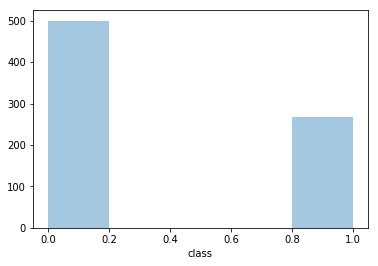

In [221]:

sns.distplot(pima_df["class"], kde = False)

In [222]:
pima_df.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

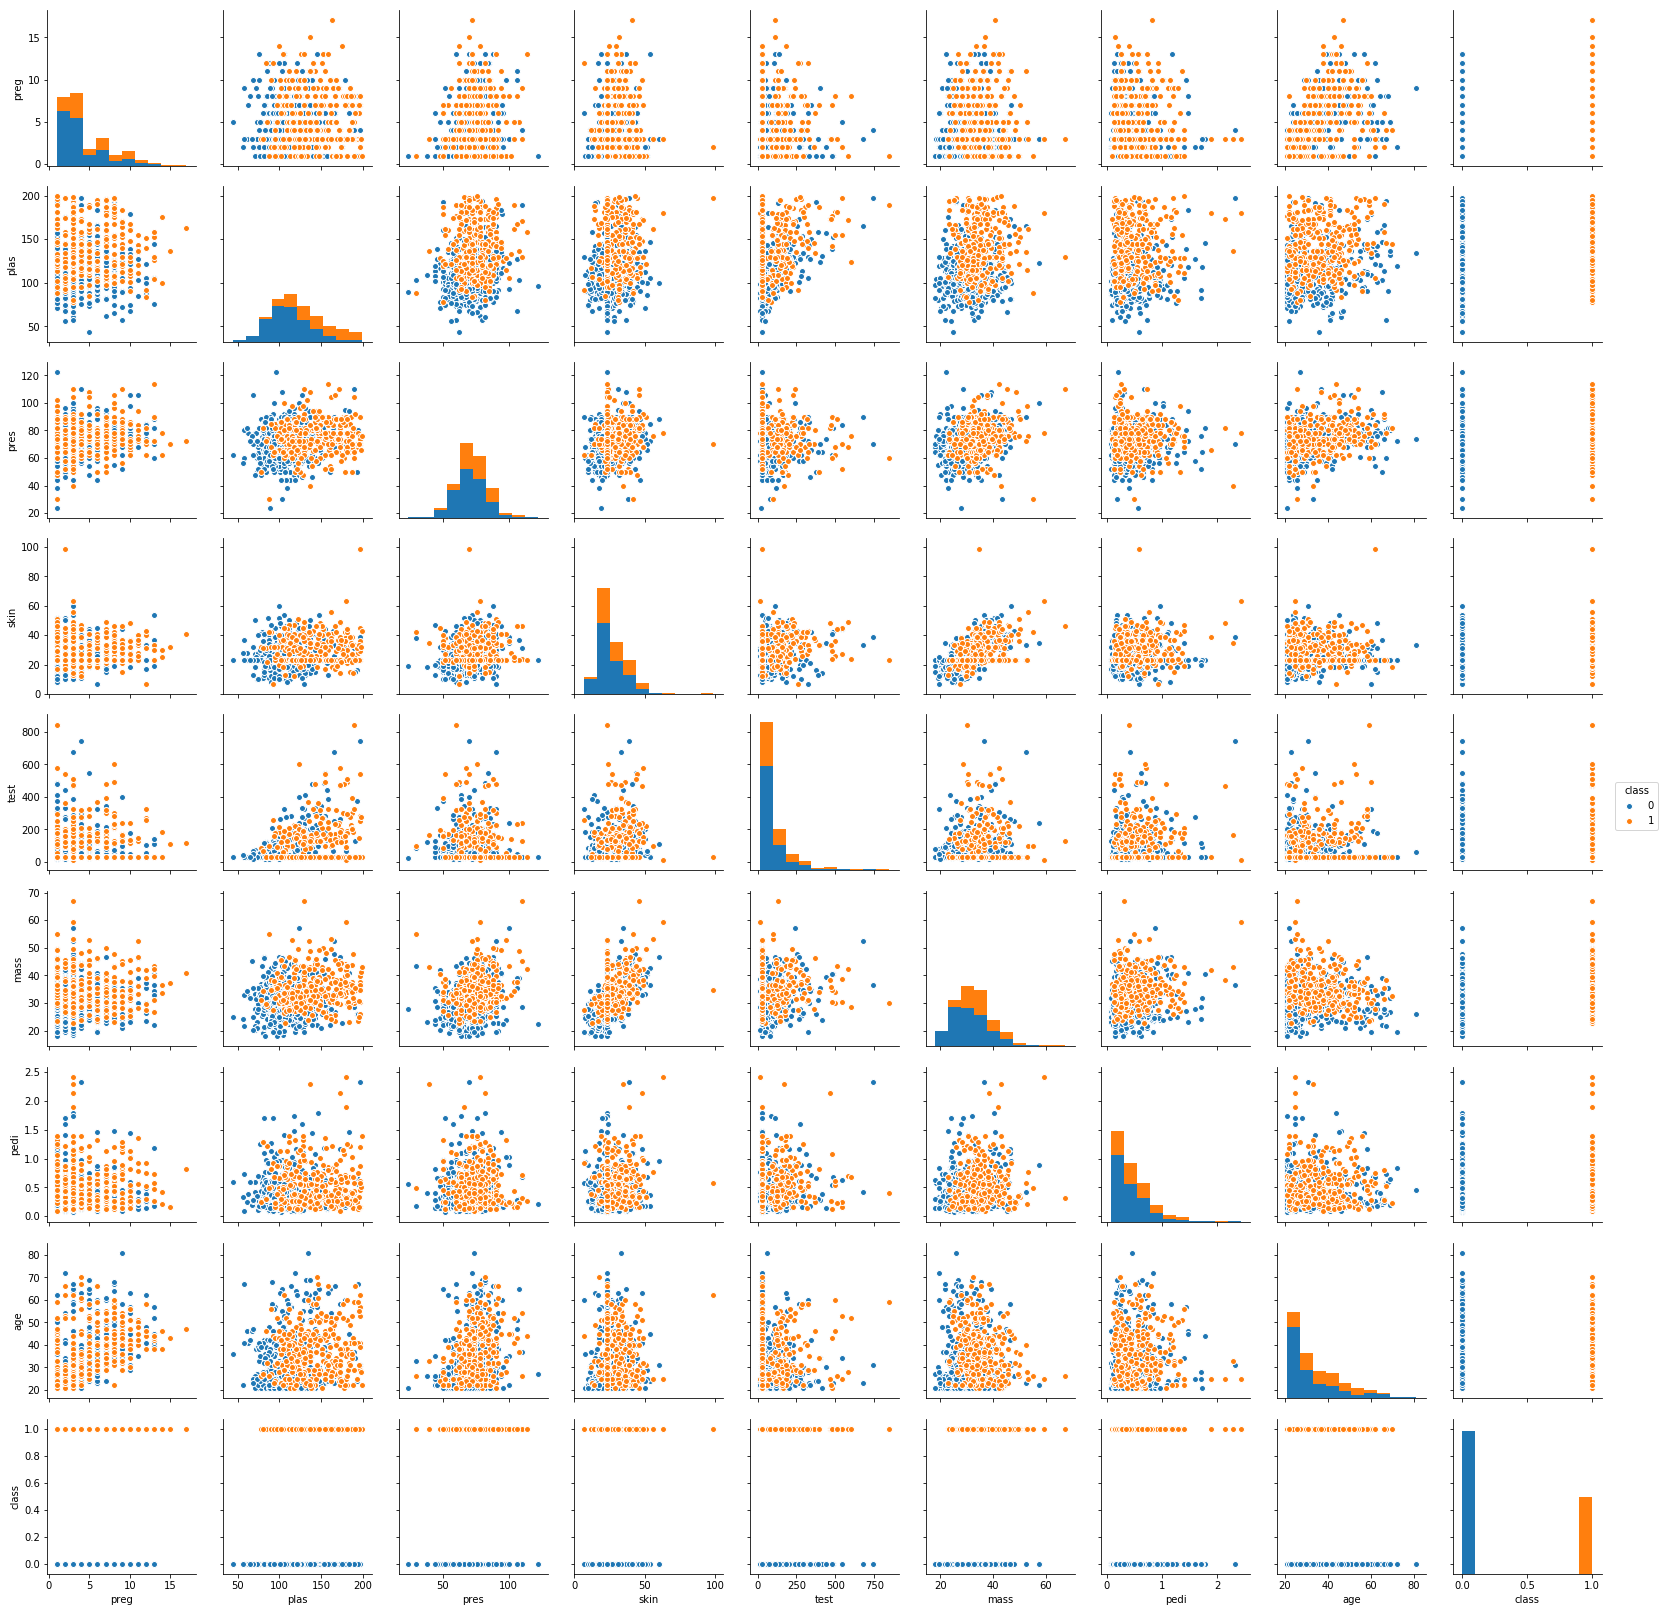

In [223]:
sns.pairplot(pima_df , hue='class' )



In [224]:
#The diagonal of the graphs overlap with eachother so the data is weak and we need addictional features for better performance

C:\Users\sharan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sharan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


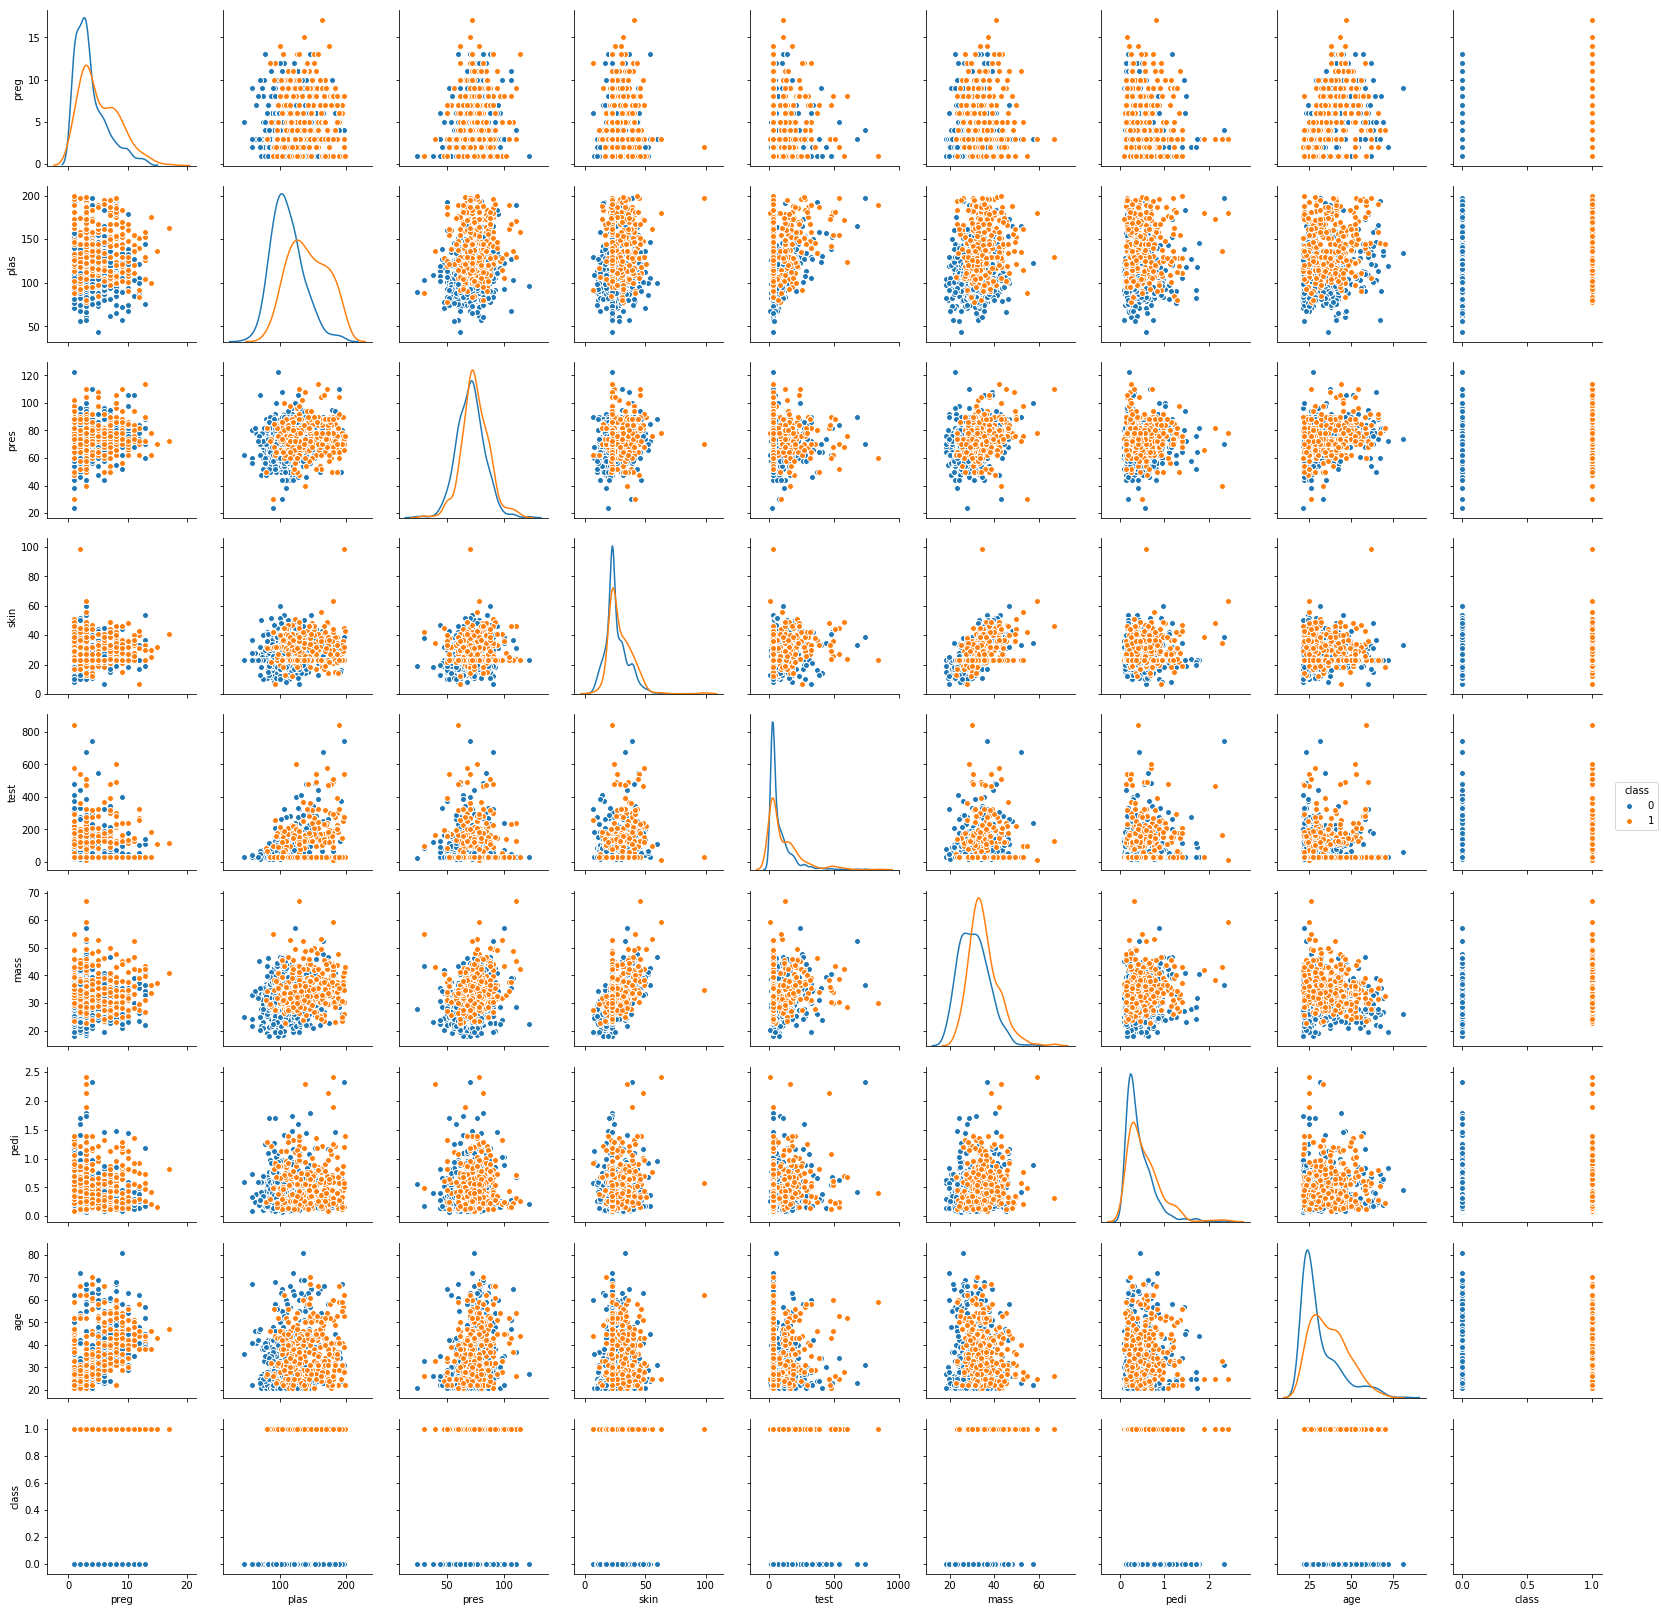

In [225]:

sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [226]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [227]:
DT= DecisionTreeClassifier (criterion="entropy",max_depth=3, random_state = 1)
DT.fit (X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [228]:
pred=DT.predict(X_test)
DT.score(X_test,y_test)

0.7662337662337663

In [229]:
from sklearn.metrics import confusion_matrix
print("The accuracy after using Entopy :",accuracy_score(y_test,pred))
print("The confusion matrix for the model is \n:",confusion_matrix(pred,y_test))

The accuracy after using Entopy : 0.7662337662337663
The confusion matrix for the model is 
: [[123  31]
 [ 23  54]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [250]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=30,random_state=1)
r.fit(X_train,y_train)
s=r.predict(X_test)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s,y_test))
print("The confusion matrix for the model is \n:",confusion_matrix(s,y_test))

The accuracy after using Random forest Classifier is: 0.7748917748917749
The confusion matrix for the model is 
: [[129  35]
 [ 17  50]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [251]:
from sklearn.ensemble import AdaBoostClassifier
p=AdaBoostClassifier(base_estimator=DT,n_estimators=7,random_state=1)
p.fit(X_train,y_train)
q=p.predict(X_test)
print("The accuracy after using Adaboosting Classifier is:",accuracy_score(q,y_test))
print("The confusion matrix for the model is \n:",confusion_matrix(q,y_test))

The accuracy after using Adaboosting Classifier is: 0.7359307359307359
The confusion matrix for the model is 
: [[116  31]
 [ 30  54]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [252]:
from sklearn.ensemble import BaggingClassifier
t=BaggingClassifier(base_estimator=DT,n_estimators=52,random_state=1)
t.fit(X_train,y_train)
u=t.predict(X_test)
print("The accuracy after using Bagging Classifier is:",accuracy_score(u,y_test))
print("The confusion matrix for the model is \n:",confusion_matrix(u,y_test))

The accuracy after using Bagging Classifier is: 0.7662337662337663
The confusion matrix for the model is 
: [[132  40]
 [ 14  45]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [253]:
from sklearn.ensemble import GradientBoostingClassifier
i=BaggingClassifier(n_estimators=50,random_state=1)
i.fit(X_train,y_train)
j=i.predict(X_test)
print("The accuracy after using GradientBoost Classifier is:",accuracy_score(j,y_test))
print("The confusion matrix for the model is \n:",confusion_matrix(j,y_test))

The accuracy after using GradientBoost Classifier is: 0.7445887445887446
The confusion matrix for the model is 
: [[123  36]
 [ 23  49]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [254]:
from sklearn.ensemble import VotingClassifier
vote=VotingClassifier(estimators=[('Decision Tree', DT),('Random Forest',r),('AdaBoost',p),('Bagging Classifier', t),('Gradient Boosting',i)],voting='hard')
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fr... n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [255]:
vo_pred=vote.predict(X_test)
print("The accuracy after using Voting Classifier is:",accuracy_score(vo_pred,y_test))
print("The confusion matrix for the model is \n:",confusion_matrix(vo_pred,y_test))

The accuracy after using Voting Classifier is: 0.7878787878787878
The confusion matrix for the model is 
: [[131  34]
 [ 15  51]]


C:\Users\sharan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
